In [1]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn import manifold
import random
import pickle
import pandas as pd
%matplotlib notebook

In [2]:
from sa import SA, FSA, Jcython
from time import time

Carregando dados gerados

In [102]:
with open('dados_desbalanceamento_10.pkl', 'rb') as file:
    d10 = pickle.load(file)
with open('dados_desbalanceamento_20.pkl', 'rb') as file:
    d20 = pickle.load(file)
    
with open('dados_novos_desbalanceamento_10.pkl', 'rb') as file:
    d_2_10 = pickle.load(file)
with open('dados_novos_desbalanceamento_20.pkl', 'rb') as file:
    d_2_20 = pickle.load(file)
data1 = {'10':d10, '20':d20}
data2 = {'10':d_2_10, '20':d_2_20}
data = {'10':dict(list(data2['10'].items()) + list(data1['10'].items()))}
data['20'] = dict(list(data2['20'].items()) + list(data1['20'].items()))

Gerando conjuntos de parâmetros

In [3]:
from itertools import combinations, product
N = [int(1e5), int(1e6)]
kmax = [8, 12, 16]
T0 = [0.5, 0.1]
mean_start = [0, 1]
desb = [10, 20]
dim = [5, 10, 15, 20]
parameters = list(product(T0, kmax, N, mean_start))
print(len(parameters))
parameters

24


[(0.5, 8, 100000, 0),
 (0.5, 8, 100000, 1),
 (0.5, 8, 1000000, 0),
 (0.5, 8, 1000000, 1),
 (0.5, 12, 100000, 0),
 (0.5, 12, 100000, 1),
 (0.5, 12, 1000000, 0),
 (0.5, 12, 1000000, 1),
 (0.5, 16, 100000, 0),
 (0.5, 16, 100000, 1),
 (0.5, 16, 1000000, 0),
 (0.5, 16, 1000000, 1),
 (0.1, 8, 100000, 0),
 (0.1, 8, 100000, 1),
 (0.1, 8, 1000000, 0),
 (0.1, 8, 1000000, 1),
 (0.1, 12, 100000, 0),
 (0.1, 12, 100000, 1),
 (0.1, 12, 1000000, 0),
 (0.1, 12, 1000000, 1),
 (0.1, 16, 100000, 0),
 (0.1, 16, 100000, 1),
 (0.1, 16, 1000000, 0),
 (0.1, 16, 1000000, 1)]

In [ ]:
df = pd.read_csv('logbook.csv', index_col=0)

In [58]:
df[['N', 'kmax', 'Dimensão', 'Tempo (em s)']].groupby(['N', 'kmax', 'Dimensão']).mean()

Tempo (em s)
N         kmax Dimensão              
100000.0  8.0  5           110.093199
               10          175.502276
          12.0 5           177.481118
               10          287.416084
               15          257.555113
               20          337.159597
          16.0 5           212.061021
               10          365.709266
               15          343.237072
               20          446.678751
1000000.0 8.0  5          1010.663248
               10         1679.105129
          12.0 5          1544.298704
               10         2197.978851
               15         2519.017648
               20         3246.787990
          16.0 5          1862.501064
               10         2568.294652
               15         3348.139478
               20         4292.128036

In [94]:
aggDF = df[df['Dimensão'] < 15][['Algoritmo', 'Dimensão', 'kmax', 'Inicializacao na média']].copy()
aggDF['diferença'] = df['Jmin'] - df['Jmin global']
aggDF.groupby(['Algoritmo', 'Dimensão', 'kmax', 'Inicializacao na média']).mean()

diferença
Algoritmo Dimensão kmax Inicializacao na média           
FSA       5        8.0  0.0                      9.610877
                        1.0                      0.552829
                   12.0 0.0                      6.597777
                        1.0                      0.701303
                   16.0 0.0                      9.844829
                        1.0                      0.536302
          10       8.0  0.0                     19.436220
                        1.0                      1.181771
                   12.0 0.0                     25.256412
                        1.0                      1.394627
                   16.0 0.0                     25.250852
                        1.0                      1.167144
SA        5        8.0  0.0                      0.785058
                        1.0                      0.548838
                   12.0 0.0                      0.554945
                        1.0                      0.271412
                   16.0 0.0                      0.454773
                        1.0                      0.158514
          10       8.0  0.0                      2.658361
                        1.0                      1.018876
                   12.0 0.0                      1.774258
                        1.0                      1.029415
                   16.0 0.0                      1.385731
                        1.0                      0.673761

In [93]:
aggDF = df[df['Dimensão'] < 15][['Algoritmo', 'N', 'Dimensão']].copy()
aggDF['diferença'] = df['Jmin'] - df['Jmin global']
aggDF.groupby(['Algoritmo', 'N', 'Dimensão']).mean()

diferença
Algoritmo N         Dimensão           
FSA       100000.0  5          3.555771
                    10        13.103192
          1000000.0 5          5.725535
                    10        11.459150
SA        100000.0  5          0.648852
                    10         1.685740
          1000000.0 5          0.275661
                    10         1.161061

In [60]:
aggDF = df[['Algoritmo', 'kmax', 'Dimensão']].copy()
aggDF['diferença'] = df['Jmin'] - df['Jmin global']
aggDF.groupby(['Algoritmo', 'kmax', 'Dimensão']).mean()

diferença
Algoritmo kmax Dimensão           
FSA       8.0  5          5.081853
               10        10.308996
          12.0 5          3.649540
               10        13.325520
               15        22.574000
               20        29.629374
          16.0 5          5.190566
               10        13.208998
               15        15.349436
               20        29.612731
SA        8.0  5          0.666948
               10         1.838619
          12.0 5          0.413178
               10         1.401837
               15         0.794983
               20         1.146130
          16.0 5          0.306643
               10         1.029746
               15         0.758514
               20         1.078100

In [100]:
aggDF = df[['Algoritmo', 'Dimensão', 'Inicializacao na média']].copy()
aggDF['diferença'] = df['Jmin'] - df['Jmin global']
aggDF = aggDF.groupby(['Algoritmo', 'Dimensão', 'Inicializacao na média']).mean()
aggDF

diferença
Algoritmo Dimensão Inicializacao na média           
FSA       5        0.0                      8.684494
                   1.0                      0.596811
          10       0.0                     23.314495
                   1.0                      1.247847
          15       0.0                     36.758268
                   1.0                      1.165168
          20       0.0                     57.717187
                   1.0                      1.524918
SA        5        0.0                      0.598259
                   1.0                      0.326255
          10       0.0                      1.939450
                   1.0                      0.907351
          15       0.0                      1.238239
                   1.0                      0.315258
          20       0.0                      1.722698
                   1.0                      0.501532

In [77]:
aggFSA = aggDF.reset_index()[aggDF.reset_index()['Algoritmo'] == 'FSA']
aggSA = aggDF.reset_index()[aggDF.reset_index()['Algoritmo'] == 'SA']

<IPython.core.display.Javascript object>


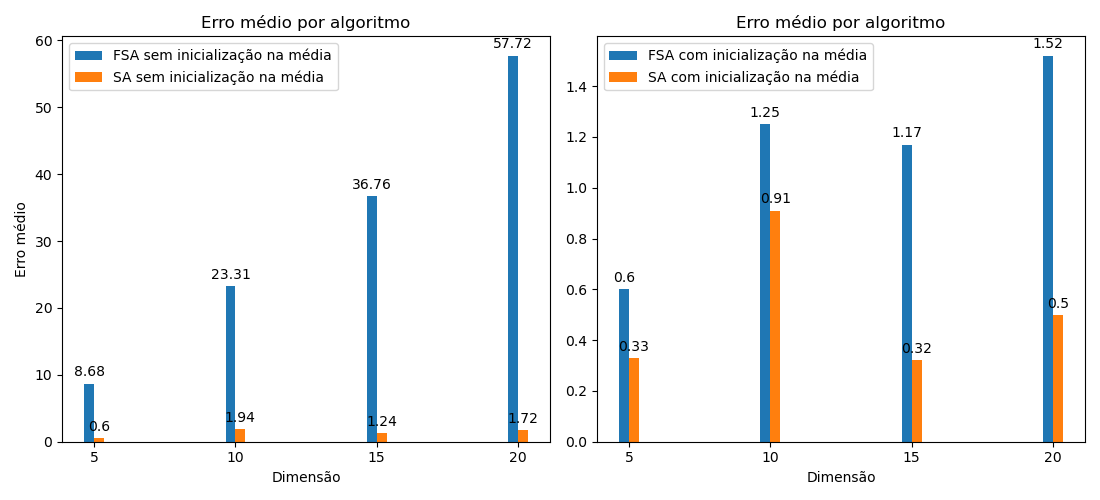

In [99]:
diff_fsa_media = np.round(aggFSA[aggFSA['Inicializacao na média'] == 1]['diferença'].values, 2)
diff_fsa_zero = np.round(aggFSA[aggFSA['Inicializacao na média'] == 0]['diferença'].values, 2)
diff_sa_media = np.round(aggSA[aggSA['Inicializacao na média'] == 1]['diferença'].values, 2)
diff_sa_zero = np.round(aggSA[aggSA['Inicializacao na média'] == 0]['diferença'].values, 2)

x = np.array([5, 10, 15, 20])  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(11,5))
rects1 = ax[0].bar(x - width/2, diff_fsa_zero, width, label='FSA sem inicialização na média')
rects2 = ax[0].bar(x + width/2, diff_sa_zero, width, label='SA sem inicialização na média')
rects3 = ax[1].bar(x - width/2, diff_fsa_media, width, label='FSA com inicialização na média')
rects4 = ax[1].bar(x + width/2, diff_sa_media, width, label='SA com inicialização na média')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xlabel('Dimensão')
ax[0].set_ylabel('Erro médio')
ax[0].set_title('Erro médio por algoritmo')
ax[0].set_xticks(x)
ax[0].legend()
ax[1].set_xlabel('Dimensão')
ax[1].set_title('Erro médio por algoritmo')
ax[1].set_xticks(x)
ax[1].legend()


def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1, ax[0])
autolabel(rects2, ax[0])
autolabel(rects3, ax[1])
autolabel(rects4, ax[1])

fig.tight_layout()

plt.show()

In [106]:
aggDF = df[df['Dimensão'] < 15][['Algoritmo', 'Desbalanceamento', 'Inicializacao na média']].copy()
aggDF['diferença'] = df['Jmin'] - df['Jmin global']
aggDF.groupby(['Algoritmo', 'Desbalanceamento', 'Inicializacao na média']).mean().round(2)

diferença
Algoritmo Desbalanceamento Inicializacao na média           
FSA       1:10             0.0                         13.97
                           1.0                          1.14
          1:20             0.0                         18.02
                           1.0                          0.71
SA        1:10             0.0                          1.45
                           1.0                          0.65
          1:20             0.0                          1.08
                           1.0                          0.59

<IPython.core.display.Javascript object>


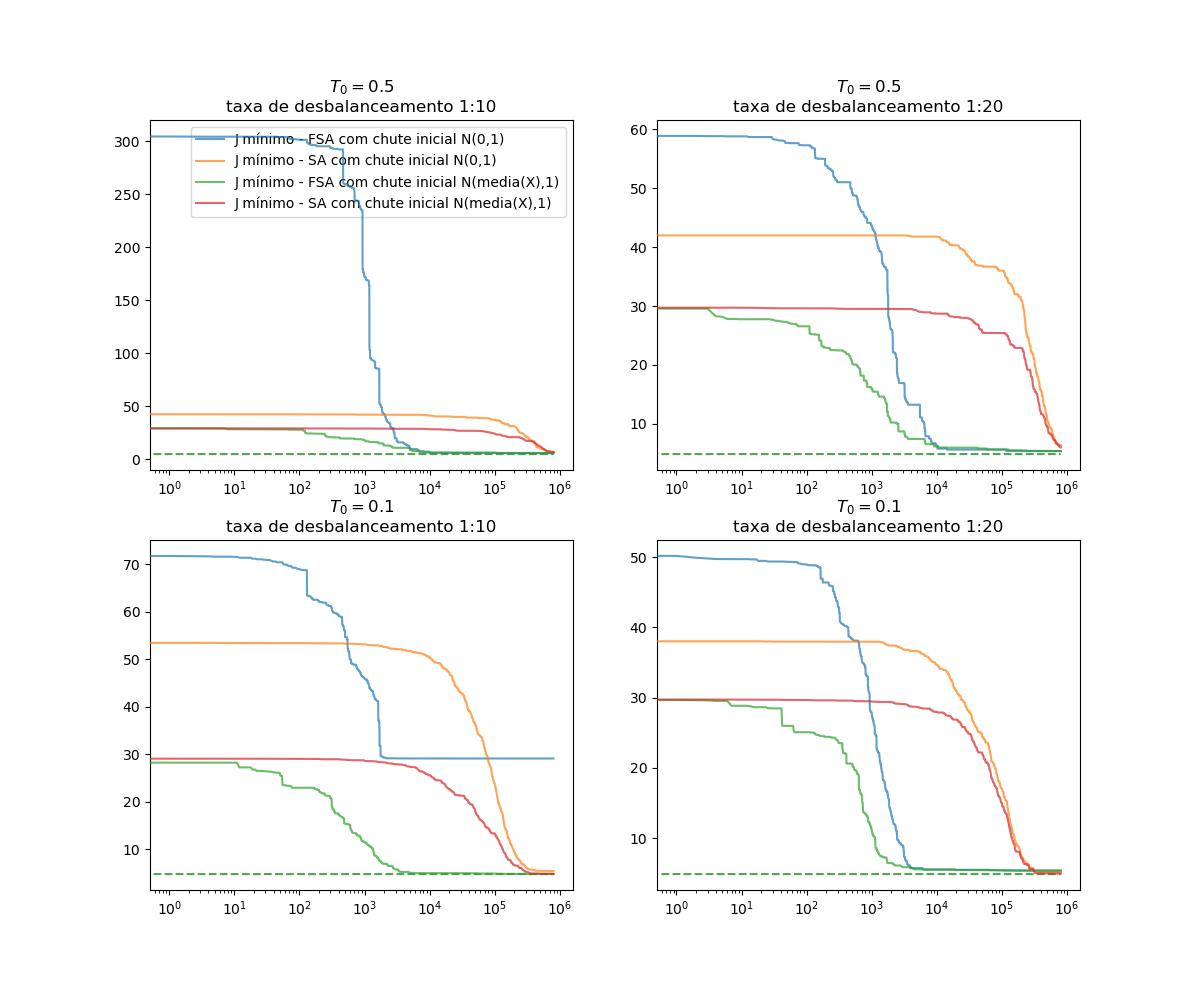

In [103]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
fig.canvas.draw_idle()
k = 8
N = 100000
R= 5

for i, t in enumerate(T0):
    for j, d in enumerate(desb):
        with open('resultados/resultados_FSA_param=({0}, {1}, {2}, 0).pkl'.format(t, k, N), 'rb') as file:
            r_fsa_0 = pickle.load(file)

        with open('resultados/resultados_SA_param=({0}, {1}, {2}, 0).pkl'.format(t, k, N), 'rb') as file:
            r_sa_0 = pickle.load(file)

        with open('resultados/resultados_FSA_param=({0}, {1}, {2}, 1).pkl'.format(t, k, N), 'rb') as file:
            r_fsa_1 = pickle.load(file)

        with open('resultados/resultados_SA_param=({0}, {1}, {2}, 1).pkl'.format(t, k, N), 'rb') as file:
            r_sa_1 = pickle.load(file)    

        variacao_fsa_0 = np.array(r_fsa_0[str(d)][str(R)][0])
        minimos_fsa_0 = np.array(r_fsa_0[str(d)][str(R)][1])

        variacao_sa_0 = np.array(r_sa_0[str(d)][str(R)][0])
        minimos_sa_0 = np.array(r_sa_0[str(d)][str(R)][1])

        variacao_fsa_1 = np.array(r_fsa_1[str(d)][str(R)][0])
        minimos_fsa_1 = np.array(r_fsa_1[str(d)][str(R)][1])

        variacao_sa_1 = np.array(r_sa_1[str(d)][str(R)][0])
        minimos_sa_1 = np.array(r_sa_1[str(d)][str(R)][1])

        x_axis = np.arange(len(variacao_fsa_0[:,1]))
        ax[i,j].semilogx(x_axis, minimos_fsa_0[:,1], '-', alpha=0.7, label="J mínimo - FSA com chute inicial N(0,1)", zorder=10)

        ax[i,j].semilogx(x_axis, minimos_sa_0[:,1], '-', alpha=0.7, label="J mínimo - SA com chute inicial N(0,1)", zorder=10)

        ax[i,j].semilogx(x_axis, minimos_fsa_1[:,1], '-', alpha=0.7, label="J mínimo - FSA com chute inicial N(media(X),1)", zorder=10)

        ax[i,j].semilogx(x_axis, minimos_sa_1[:,1], '-', alpha=0.7, label="J mínimo - SA com chute inicial N(media(X),1)", zorder=10)
        ax[i,j].semilogx(x_axis, np.ones(len(x_axis))*Jcython(data[str(d)]['X_R'+str(R)][:,:-1], data[str(d)]['Y_R'+str(R)]), '--', c='g', alpha=0.7)
        ax[i,j].set_title(r"$T_0="+str(t)+"$\ntaxa de desbalanceamento 1:" + str(d))
        if i == 0 and j == 0:
            ax[i,j].legend(loc='upper right')
plt.show()

<IPython.core.display.Javascript object>


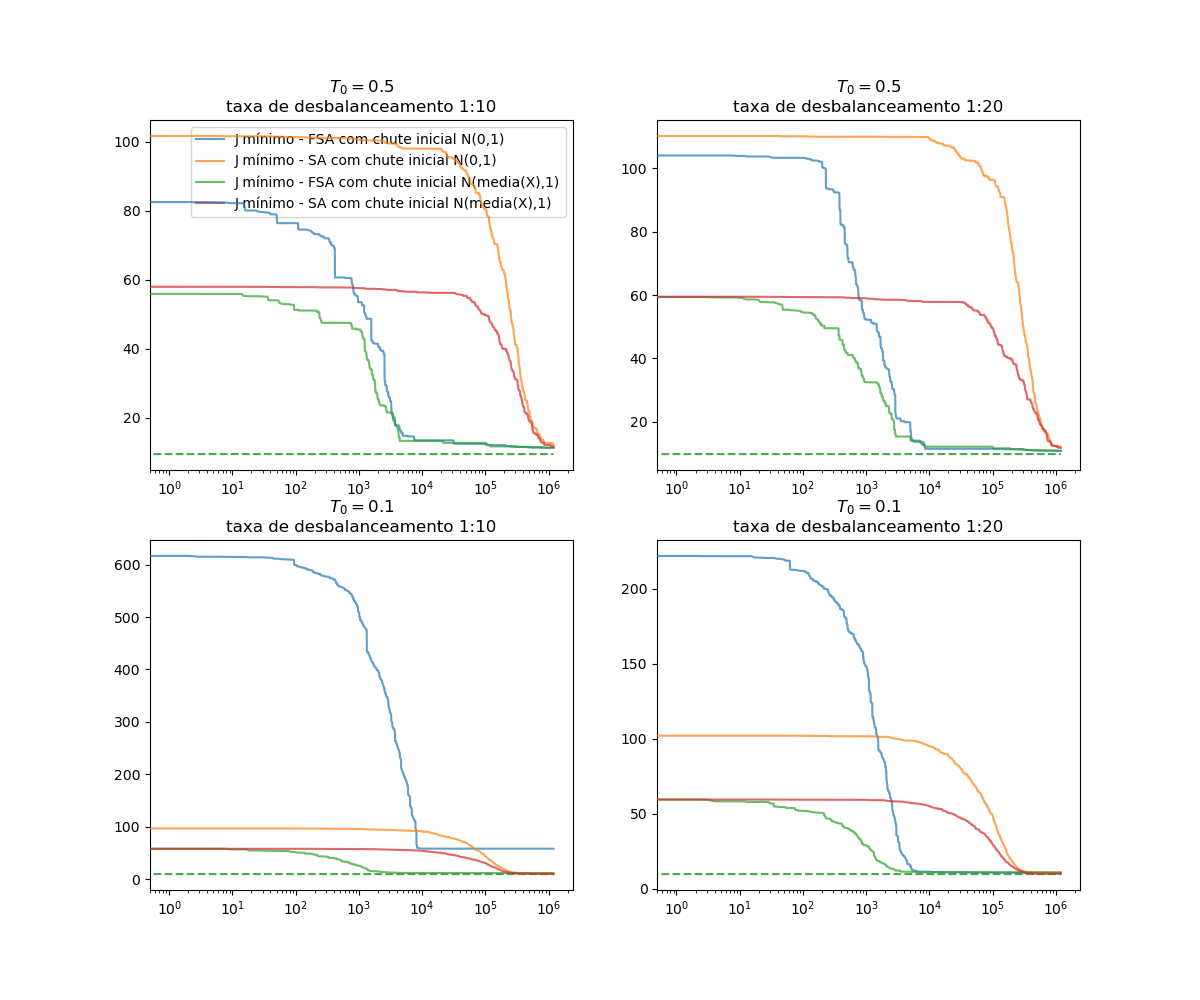

In [104]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
fig.canvas.draw_idle()
k = 12
N = 100000
R = 10

for i, t in enumerate(T0):
    for j, d in enumerate(desb):
        with open('resultados/resultados_FSA_param=({0}, {1}, {2}, 0).pkl'.format(t, k, N), 'rb') as file:
            r_fsa_0 = pickle.load(file)

        with open('resultados/resultados_SA_param=({0}, {1}, {2}, 0).pkl'.format(t, k, N), 'rb') as file:
            r_sa_0 = pickle.load(file)

        with open('resultados/resultados_FSA_param=({0}, {1}, {2}, 1).pkl'.format(t, k, N), 'rb') as file:
            r_fsa_1 = pickle.load(file)

        with open('resultados/resultados_SA_param=({0}, {1}, {2}, 1).pkl'.format(t, k, N), 'rb') as file:
            r_sa_1 = pickle.load(file)    

        variacao_fsa_0 = np.array(r_fsa_0[str(d)][str(R)][0])
        minimos_fsa_0 = np.array(r_fsa_0[str(d)][str(R)][1])

        variacao_sa_0 = np.array(r_sa_0[str(d)][str(R)][0])
        minimos_sa_0 = np.array(r_sa_0[str(d)][str(R)][1])

        variacao_fsa_1 = np.array(r_fsa_1[str(d)][str(R)][0])
        minimos_fsa_1 = np.array(r_fsa_1[str(d)][str(R)][1])

        variacao_sa_1 = np.array(r_sa_1[str(d)][str(R)][0])
        minimos_sa_1 = np.array(r_sa_1[str(d)][str(R)][1])

        x_axis = np.arange(len(variacao_fsa_0[:,1]))
        ax[i,j].semilogx(x_axis, minimos_fsa_0[:,1], '-', alpha=0.7, label="J mínimo - FSA com chute inicial N(0,1)", zorder=10)

        ax[i,j].semilogx(x_axis, minimos_sa_0[:,1], '-', alpha=0.7, label="J mínimo - SA com chute inicial N(0,1)", zorder=10)

        ax[i,j].semilogx(x_axis, minimos_fsa_1[:,1], '-', alpha=0.7, label="J mínimo - FSA com chute inicial N(media(X),1)", zorder=10)

        ax[i,j].semilogx(x_axis, minimos_sa_1[:,1], '-', alpha=0.7, label="J mínimo - SA com chute inicial N(media(X),1)", zorder=10)
        ax[i,j].semilogx(x_axis, np.ones(len(x_axis))*Jcython(data[str(d)]['X_R'+str(R)][:,:-1], data[str(d)]['Y_R'+str(R)]), '--', c='g', alpha=0.7)
        ax[i,j].set_title(r"$T_0="+str(t)+"$\ntaxa de desbalanceamento 1:" + str(d))
        if i == 0 and j == 0:
            ax[i,j].legend(loc='upper right')
plt.show()